# Data analysis of IS-Academia database

Import the IS-Academia dataset as an excel spreadsheet. See 'Data from IS Academia.ipynb' for the collection of the databases.

In [1]:
import numpy as np
import matplotlib as plt
%matplotlib inline
import pandas as pd

In [8]:
data = pd.read_excel('dataISAcademia.xls','Sheet1')
data = data.set_index('No Sciper')

# Bachelor students - get the table

We want to compute the average stay of Bachelor students at the EPFL, in terms of the number of semesters spent at the university. We exploit the fact that each student is identified by its sciper number.

In [139]:
# define a smaller dataset to perform operations on - we do not care about the academic year by now
data1 = data[['Civilité','Période académique']]

# used to filter the kind of academic cycle - bachelor or master
def substring(y,x):
    return y in x

ind = []
for l in data1['Période académique']:
    ind.append(substring('Bachelor',l))

bachelor = data1[ind]

# count the instances of any sciper number and append it to the filtered dataset
semesters = bachelor.index.value_counts()

# remove the duplicates of sciper numbers
bachelor = bachelor[~bachelor.index.duplicated(keep='first')]
bachelor['Semestres']=semesters
del bachelor['Période académique']

Now the table is the simplest possible to analyze the statistical aspects of the permanence stay at the EPFL for bachelor students.

# Permanence stay for Bachelor students

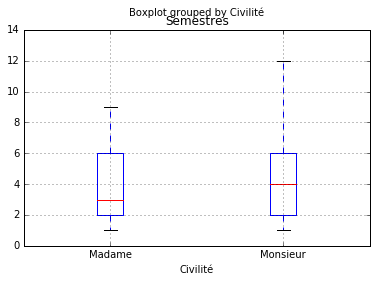

In [140]:
# boxplot to understand the general distribution per sex
bachelor.boxplot(column = 'Semestres', by = 'Civilité')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BED2518>]], dtype=object)

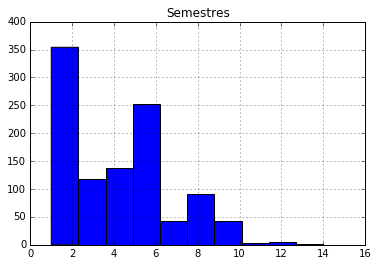

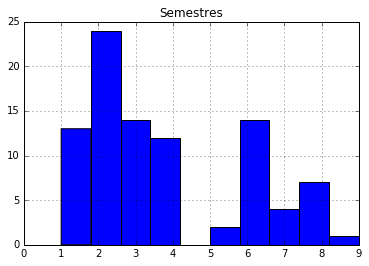

In [153]:
# distributions of male and female students
bachelor[bachelor['Civilité']=='Monsieur'].hist()
bachelor[bachelor['Civilité']=='Madame'].hist()

In [154]:
bachelor_sex = bachelor.groupby(bachelor['Civilité'])
bachelor_sex.describe()

Semestres
Civilité                   
Madame   count    91.000000
         mean      3.714286
         std       2.237487
         min       1.000000
         25%       2.000000
         50%       3.000000
         75%       6.000000
         max       9.000000
Monsieur count  1047.000000
         mean      4.333333
         std       2.503280
         min       1.000000
         25%       2.000000
         50%       4.000000
         75%       6.000000
         max      14.000000